In [65]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-72e1c0d1-ef22-f565-07a0-74bbf4314730)


In [66]:
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

--2023-05-23 12:01:23--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.6.128, 108.177.112.128, 74.125.124.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.6.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip.1’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.005s  

2023-05-23 12:01:24 (124 MB/s) - ‘nlp_getting_started.zip.1’ saved [607343/607343]



In [3]:
import zipfile

In [67]:
zip_nlp = zipfile.ZipFile("nlp_getting_started.zip.1","r")
zip_nlp.extractall()
zip_nlp.close()

In [125]:
import pandas as pd
train_nlp = pd.read_csv("train.csv")
test_nlp = pd.read_csv("test.csv")
train_nlp.head()


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [126]:
test_nlp.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [69]:
train_nlp_shuffled = train_nlp.sample(frac=1, random_state=42)
train_nlp_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [71]:
train_nlp.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [72]:
len(train_nlp),len(test_nlp),len(train_nlp)+len(test_nlp)

(7613, 3263, 10876)

In [73]:
from sklearn.model_selection import train_test_split

In [84]:
x = train_nlp_shuffled['text']
y = train_nlp_shuffled["target"]

In [85]:

x_train, x_val, y_train, y_val = train_test_split(x,
                                                  y,
                                                  test_size=0.1)                  
                                      

In [86]:
import tensorflow as tf

In [77]:
from tensorflow.keras import layers


In [78]:
text_vector = layers.TextVectorization(max_tokens=None,
                                standardize="lower_and_strip_punctuation",
                                split="whitespace",
                                ngrams=None,
                                output_mode="int",
                                output_sequence_length=None
                                )

In [146]:
for i in  x_train:
  total_words=sum([len(i.split())])



SyntaxError: ignored

In [80]:
max_vocab_length = 10000
max_length = 15

model_1:simple_neural_network

In [87]:
text_vector = layers.TextVectorization(max_tokens=max_vocab_length,
                                  output_mode="int",
                                  output_sequence_length=max_length
                                  )

In [88]:
text_vector.adapt(x_train)

In [89]:
tf.random.set_seed(42)

embedding = layers.Embedding(input_dim=max_vocab_length,
                           output_dim=128,
                           embeddings_initializer="uniform",
                           input_length=max_length,
                           name="embedding_1"  
                           )

In [90]:
inputs = layers.Input(shape=(1,),dtype="string")
x = text_vector(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1,activation="sigmoid")(x)
model_1 = tf.keras.Model(inputs,outputs)

In [91]:
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [92]:
model_1.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_4 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d_1   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
Non-tra

In [93]:
model_1_trained = model_1.fit(x_train,
                          y_train,
                          epochs=5,
                          validation_data=(x_val,y_val))

Epoch 1/5
215/215 [==============================] - 13s 54ms/step - loss: 0.6112 - accuracy: 0.6892 - val_loss: 0.5419 - val_accuracy: 0.7454
Epoch 2/5
215/215 [==============================] - 2s 8ms/step - loss: 0.4415 - accuracy: 0.8168 - val_loss: 0.4812 - val_accuracy: 0.7795
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.3464 - accuracy: 0.8618 - val_loss: 0.4738 - val_accuracy: 0.7992
Epoch 4/5
215/215 [==============================] - 3s 12ms/step - loss: 0.2826 - accuracy: 0.8917 - val_loss: 0.4901 - val_accuracy: 0.7861
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.2351 - accuracy: 0.9134 - val_loss: 0.5165 - val_accuracy: 0.7835


In [94]:
model_1.evaluate(x_val,y_val)

24/24 [==============================] - 0s 3ms/step - loss: 0.5165 - accuracy: 0.7835


[0.5164547562599182, 0.7834645509719849]

In [95]:
model_1_preds = model_1.predict(x_val)
model_1_preds[:10]

24/24 [==============================] - 0s 2ms/step


array([[0.00684743],
       [0.5537575 ],
       [0.15419346],
       [0.03362457],
       [0.36489826],
       [0.24661848],
       [0.05413999],
       [0.6861769 ],
       [0.9841055 ],
       [0.07977935]], dtype=float32)

In [96]:
model_1_preds = tf.squeeze(tf.round(model_1_preds))
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 0., 0., 0., 0., 0., 1., 1., 0.], dtype=float32)>

In [97]:
from sklearn.metrics import accuracy_score,precision_recall_fscore_support

In [98]:
def evaluate(y_true, y_pred):
  model_accuracy = accuracy_score(y_true, y_pred)
  model_precision, model_recall, model_f1,_ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_evaluate = {"accuracy": model_accuracy,
                   "precision" : model_precision,
                   "recall"  : model_recall,
                   "f1" : model_f1}
  return model_evaluate

In [99]:
model_1_evaluate = evaluate(y_true=y_val, y_pred=model_1_preds)
model_1_evaluate

{'accuracy': 0.7834645669291339,
 'precision': 0.7840764784087203,
 'recall': 0.7834645669291339,
 'f1': 0.7816592218891579}

model_2:Conv1D


In [100]:

tf.random.set_seed(42)
from tensorflow.keras import layers
model_2_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_2")

In [101]:

input = layers.Input(shape=(1,), dtype="string")
x = text_vector(input)
x = model_2_embedding(x)
x = layers.Conv1D(filters=32, kernel_size=5, activation="relu")(x)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(input, outputs,name= "model_2_Con1D")


In [104]:
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [105]:
model_2.summary()


Model: "model_2_Con1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_4 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_2 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 32)            20512     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_5 (Dense)             (None, 1)               

In [106]:
model_2_trained = model_2.fit(x_train,
                              y_train,
                              epochs=5,
                              validation_data=(x_val,y_val))

Epoch 1/5
215/215 [==============================] - 16s 67ms/step - loss: 0.5617 - accuracy: 0.7228 - val_loss: 0.4882 - val_accuracy: 0.7690
Epoch 2/5
215/215 [==============================] - 2s 9ms/step - loss: 0.3382 - accuracy: 0.8645 - val_loss: 0.5108 - val_accuracy: 0.7822
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.2095 - accuracy: 0.9231 - val_loss: 0.5988 - val_accuracy: 0.7572
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.1330 - accuracy: 0.9562 - val_loss: 0.7204 - val_accuracy: 0.7520
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0972 - accuracy: 0.9686 - val_loss: 0.7855 - val_accuracy: 0.7598


In [107]:
model_2_preds = model_2.predict(x_val)
model_2_preds[:10]

24/24 [==============================] - 0s 2ms/step


array([[0.00653753],
       [0.26949325],
       [0.05069979],
       [0.00236432],
       [0.12974928],
       [0.14769287],
       [0.0043363 ],
       [0.73958355],
       [0.9871602 ],
       [0.04722539]], dtype=float32)

In [108]:
model_2_preds_con = tf.squeeze(tf.round(model_2_preds))
model_2_preds_con[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 1., 1., 0.], dtype=float32)>

In [109]:
model_2_evaluate = evaluate(y_true=y_val, y_pred=model_2_preds_con)
model_2_evaluate

{'accuracy': 0.7598425196850394,
 'precision': 0.7594458009665143,
 'recall': 0.7598425196850394,
 'f1': 0.7583610815982363}

mdel_3:TensorFlow Hub(pretrained sentence encoder)

In [110]:
import tensorflow as tf
from tensorflow.keras import layers


In [111]:
import tensorflow_hub as hub
hub_sentence_ncoder = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [112]:
embedding_3 = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                             input_shape=[],
                             dtype= tf.string,
                             trainable=False,
                             name="USE")

In [113]:
model_3 = tf.keras.Sequential([
    embedding_3,
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid"),
])

In [114]:
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [115]:
model_3.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_6 (Dense)             (None, 64)                32832     
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [116]:
model_3_trained = model_3.fit(x_train,
                              y_train,
                              epochs=5,
                              validation_data=(x_val,y_val))

Epoch 1/5
215/215 [==============================] - 6s 14ms/step - loss: 0.5067 - accuracy: 0.7796 - val_loss: 0.4539 - val_accuracy: 0.7808
Epoch 2/5
215/215 [==============================] - 3s 15ms/step - loss: 0.4150 - accuracy: 0.8155 - val_loss: 0.4428 - val_accuracy: 0.7900
Epoch 3/5
215/215 [==============================] - 4s 17ms/step - loss: 0.4001 - accuracy: 0.8270 - val_loss: 0.4400 - val_accuracy: 0.7913
Epoch 4/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3909 - accuracy: 0.8308 - val_loss: 0.4378 - val_accuracy: 0.7979
Epoch 5/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3830 - accuracy: 0.8326 - val_loss: 0.4388 - val_accuracy: 0.7953


In [117]:
model_3_preds = model_3.predict(x_val)
model_3_preds_con = tf.squeeze(tf.round(model_3_preds))
model_3_preds_con[:10]
model_3_evaluate = evaluate(y_true=y_val, y_pred=model_3_preds_con)
model_3_evaluate


24/24 [==============================] - 1s 9ms/step


{'accuracy': 0.7952755905511811,
 'precision': 0.7962618309075002,
 'recall': 0.7952755905511811,
 'f1': 0.7935097267253358}

In [118]:
all_models = pd.DataFrame({"simple_neural_network":model_1_evaluate,
                          "conv1D":model_2_evaluate,
                          "tf_hub_sentence_ncoder":model_3_evaluate,}
                          )

In [119]:
all_models = all_models.transpose()
all_models

,accuracy,precision,recall,f1
simple_neural_network,0.783465,0.784076,0.783465,0.781659
conv1D,0.759843,0.759446,0.759843,0.758361
tf_hub_sentence_ncoder,0.795276,0.796262,0.795276,0.793510


<Axes: >

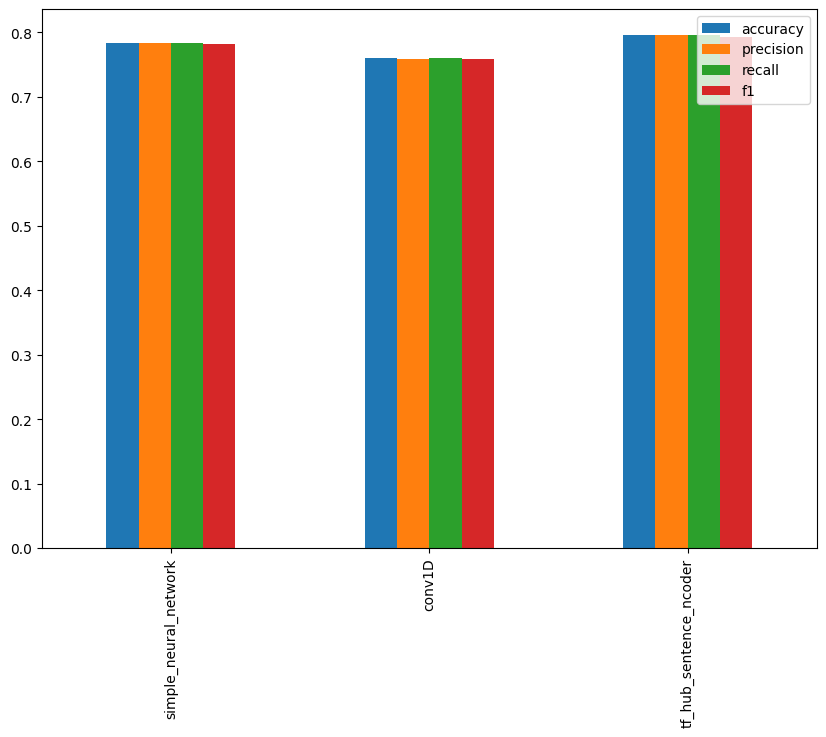

In [120]:
all_models.plot(kind="bar", figsize=(10,7))

<Axes: >

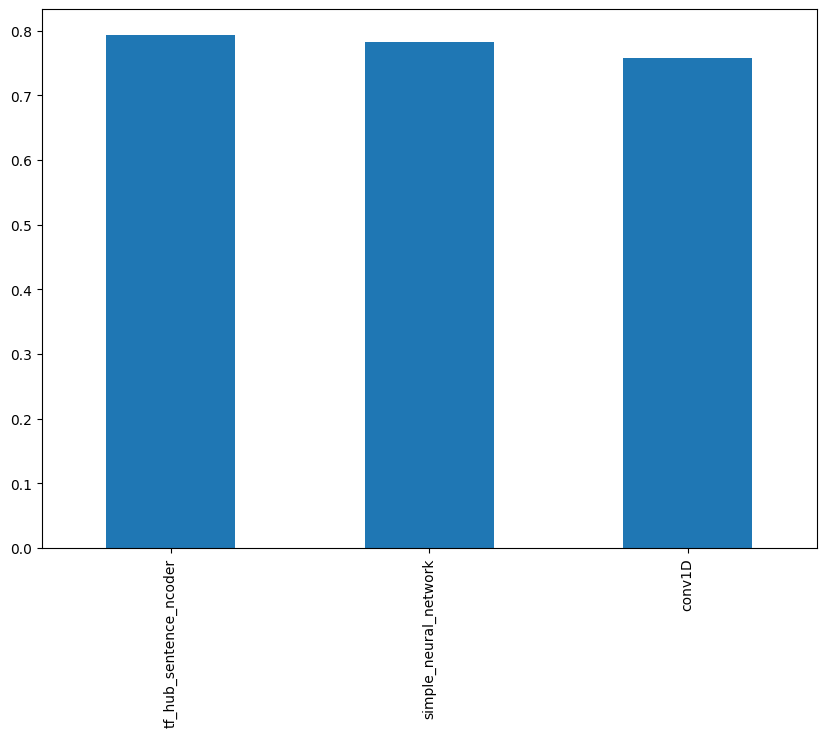

In [121]:
all_models.sort_values("f1",ascending=False)["f1"].plot(kind='bar',figsize=(10,7))


make prediction on test dataset

In [150]:
import random
x_test =test_nlp["text"].to_list()
x_test_samples = random.sample(x_test,1)
for x_test_sample in x_test_samples:
  y_preds =tf.round(tf.squeeze(model_3.predict([x_test_sample])))
  print(f"prediction: {y_preds}") 
  print(f"sentence:{x_test_samples}")


1/1 [==============================] - 0s 44ms/step
prediction: 0.0
sentence:["Don't think I can be more blunt lol yet the message still isn't sinking in ??????"]


save models

In [137]:
model_1.save("model_1_SavedModel_format")

In [138]:
loadded_model_1 = tf.keras.models.load_model("model_1_SavedModel_format")

In [139]:
model_2.save("model_2_SavedModel_format")

In [140]:
model_3.save("model_2_SavedModel_format")